# What are RMSDs during short trajectories?

In [1]:
import glob
import importlib
import os
import random
import sys
from itertools import combinations

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import prettypyplot as pplt
import scipy
import seaborn as sns
from matplotlib import ticker
import mdtraj as md

import extq

In [2]:
sys.path.insert(1, "../../../python")
sys.path.insert(1, "../../../..")
import plotting
import util

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
mpl.colormaps.register(cm_div, force=True)
pplt.load_cmaps()

In [4]:
# collect files
remove = {
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
files = []
for i in range(295):
    if (i + 1000) not in remove:
        files.append(f"/beagle3/dinner/scguo/anton-old/xtc1000ns/civsd-{i}.xtc")

for i in range(3, 119):
    if i == 82:
        continue
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [28]:
def traj_rmsd(topfile, file):
    traj = md.load(file, top=topfile)
    noh_ids = traj.top.select("protein and not type H")
    traj.superpose(traj, frame=0, atom_indices=noh_ids)
    rmsd = md.rmsd(traj, traj, atom_indices=noh_ids)
    return rmsd * 10

In [6]:
topfile = "/project/dinner/scguo/ci-vsd/civsd-pro.psf"
rmsd_test = traj_rmsd(topfile, files[0])

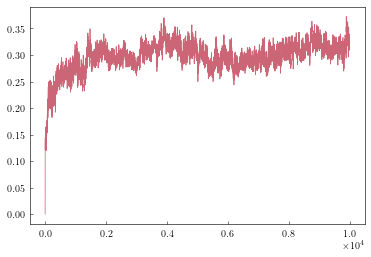

In [22]:
traj = md.load(files[1], top=topfile)
traj.superpose(traj, frame=0, atom_indices=traj.top.select("protein and not type H"))

rmsd = md.rmsd(traj, traj, atom_indices=traj.top.select("protein and not type H"))

plt.plot(rmsd)

In [29]:
rmsd_trajs = []
for f in files:
    rmsd_trajs.append(traj_rmsd(topfile, f))

In [33]:
np.save("../../../data/raw_feat/rmsd_trajs.npy", rmsd_trajs)

/beagle3/dinner/scguo/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


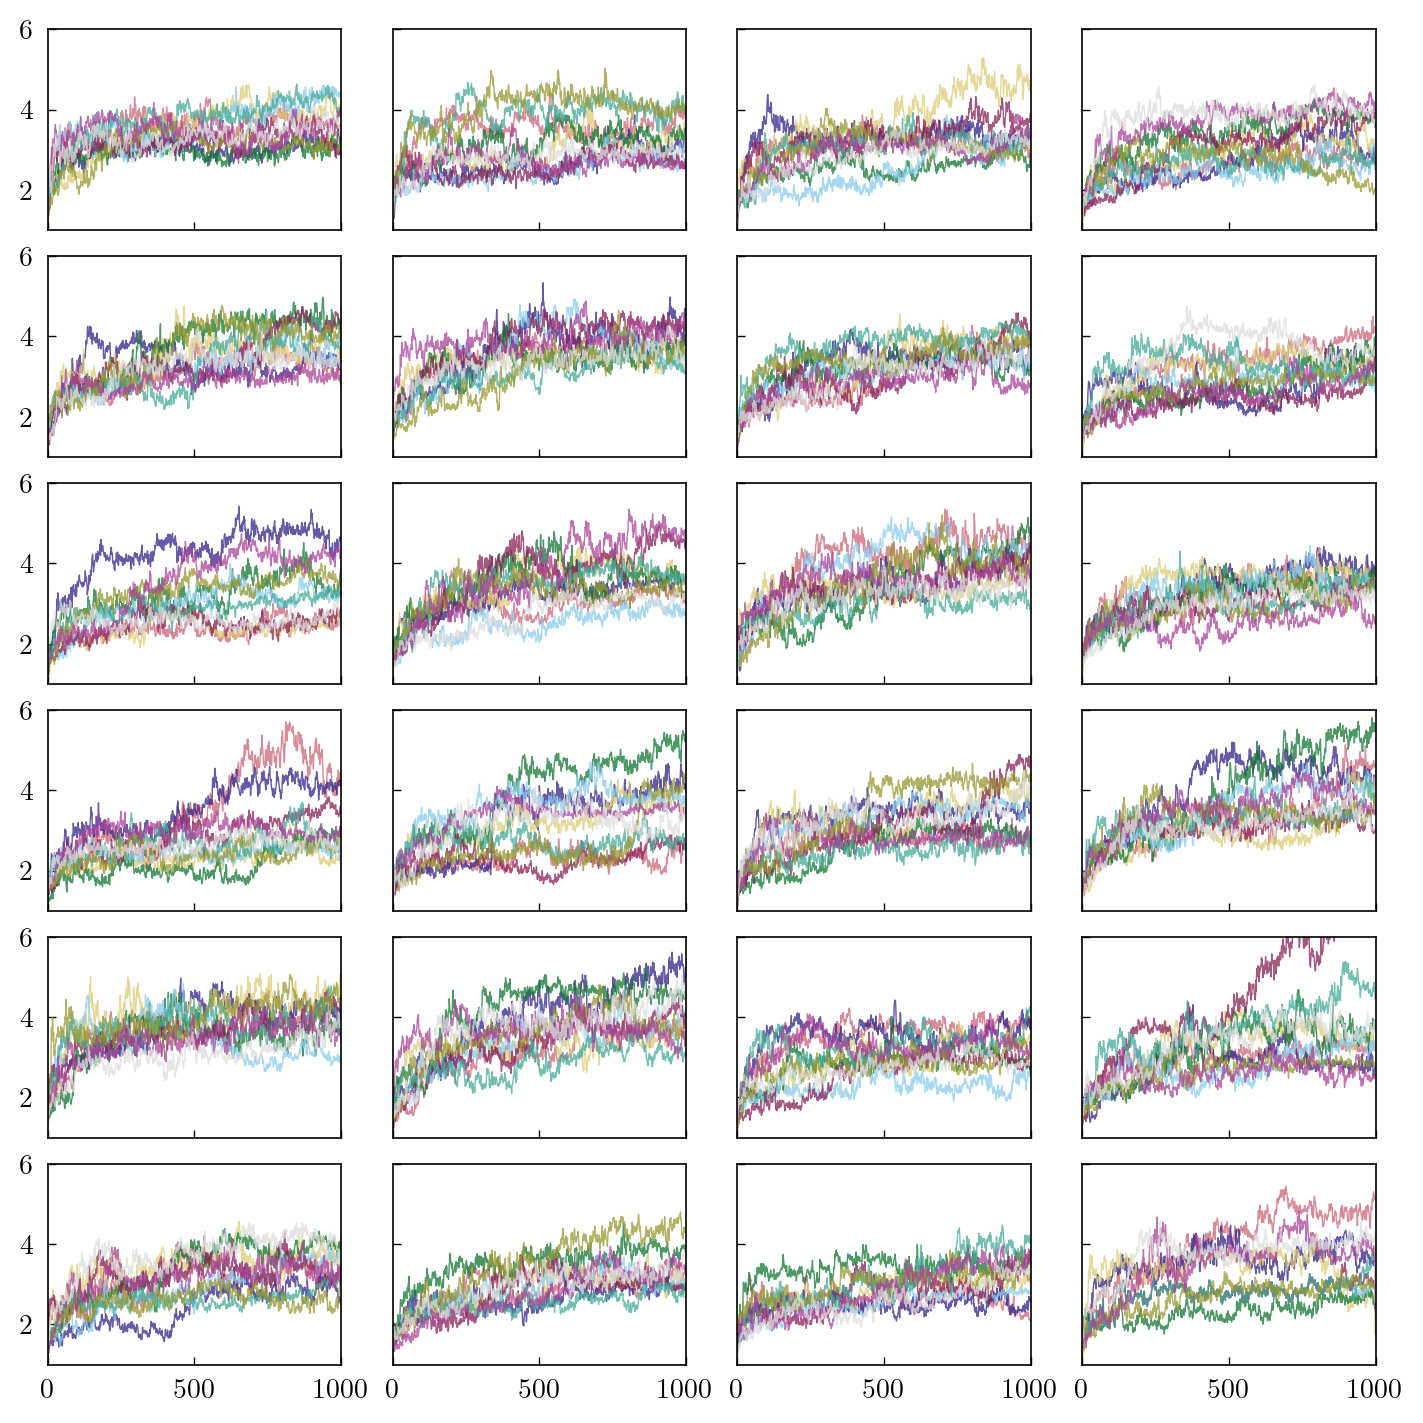

In [32]:
fig, axes = plt.subplots(6, 4, dpi=200, figsize=(7, 7), sharey=True, sharex=True, constrained_layout=True)
for i, ax in enumerate(axes.flat):
    for j in range(i * 10, (i + 1) * 10):
        ax.plot(util.moving_average(rmsd_trajs[j], 10)[10::10], lw=0.5, alpha=0.75)
        ax.set_xlim([0, 1000])
        ax.set_ylim([1, 6])

Text(0.5, 0, 'Maximum RMSD / $\\textrm{\\AA}$')

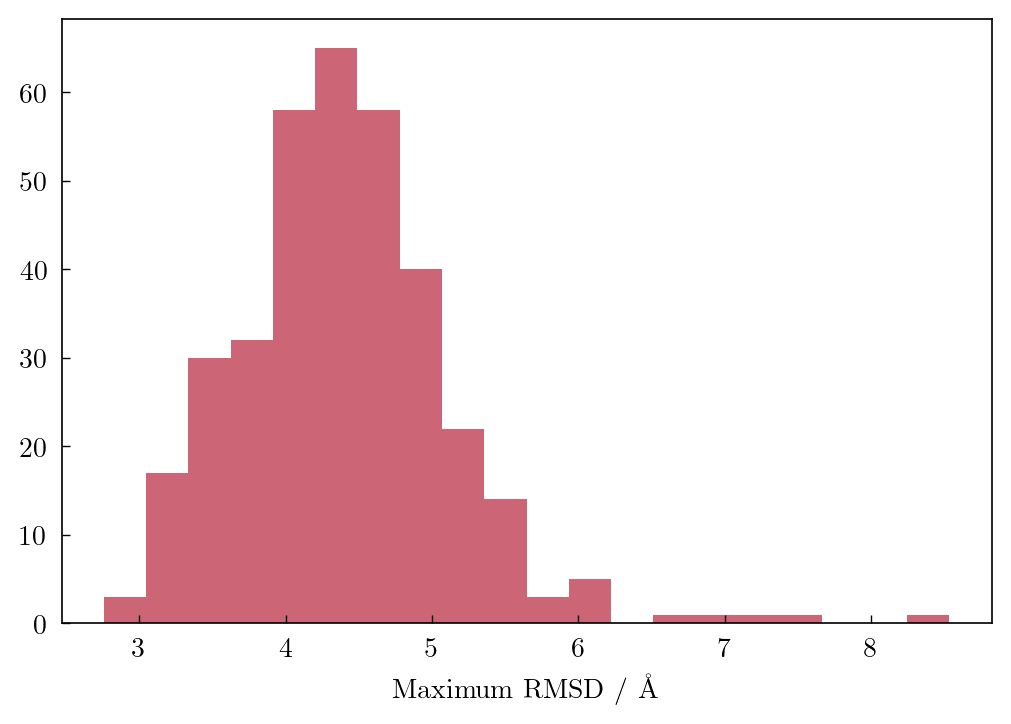

In [37]:
# histogram max RMSD
fig = plt.figure(dpi=200)
plt.hist([np.max(traj) for traj in rmsd_trajs], bins=20)
plt.xlabel("Maximum RMSD / $\\textrm{\AA}$")

Text(0.5, 0, 'Average RMSD / $\\textrm{\\AA}$')

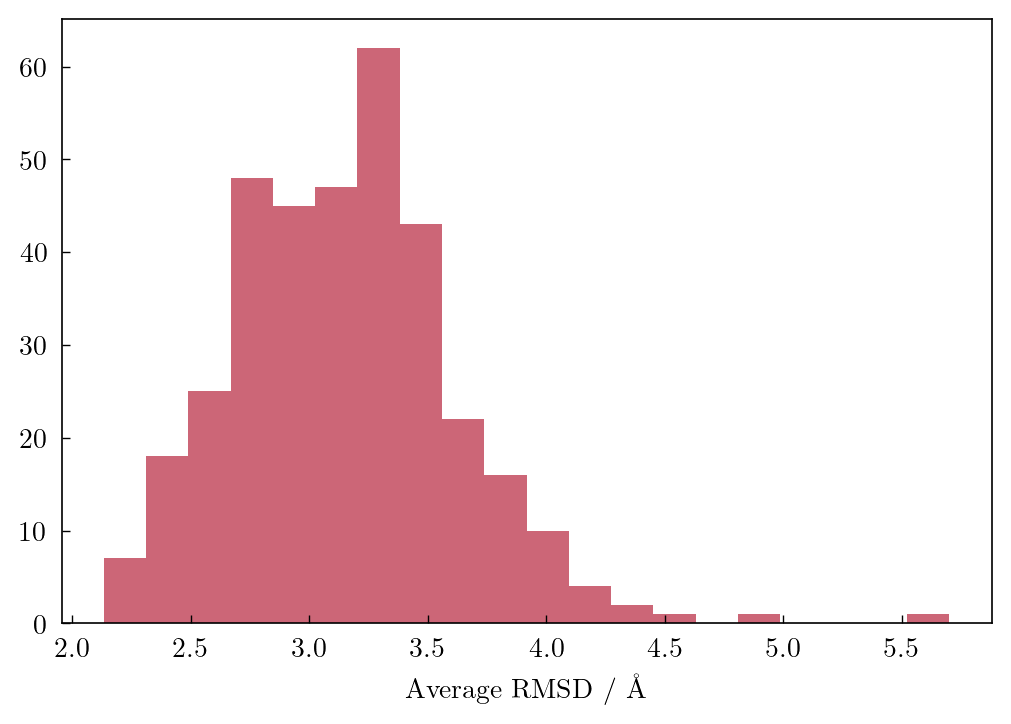

In [38]:
# histogram max RMSD
fig = plt.figure(dpi=200)
plt.hist([np.mean(traj) for traj in rmsd_trajs], bins=20)
plt.xlabel("Average RMSD / $\\textrm{\AA}$")

In [39]:
down = md.load("../../../models/MD-clustering-center/civsd-down-gc.pdb")
up = md.load("../../../models/MD-clustering-center/civsd-up-gc.pdb")

In [44]:
noh_ids = down.top.select("protein and not type H")
down.superpose(up, frame=0, atom_indices=noh_ids)

<mdtraj.Trajectory with 1 frames, 56582 atoms, 10692 residues, and unitcells at 0x7f0eaca375b0>

In [47]:
md.rmsd(down, up, atom_indices=noh_ids) * 10

array([3.8943326], dtype=float32)